In [51]:
class finance:
    import datetime
    import numpy as np
    import pandas as pd
    %matplotlib inline
    import pandas_datareader.data as web
    import fix_yahoo_finance as yf
    import math
    import matplotlib.pyplot as plt
    
    def __init__(self,ticker):
        self.ticker = ticker
        
    def financial(self,IS=0,BS=0,CF=0):
        import requests
        from bs4 import BeautifulSoup
        import pandas as pd
        IS_keyword = ['Revenue','Operating Expenses','Income from Continuing Operations','Non-recurring Events','Net Income']
        BS_keyword = ['Assets','Liabilities','Equity']
        CF_keyword = ['Net Income','Operating Activities','Investing Activities','Financing Activities','Cash']
        link = 'https://finance.yahoo.com/quote/' + self.ticker + '/financials?p=' + self.ticker
        keyword = IS_keyword
        if BS:
            link = 'https://finance.yahoo.com/quote/' + self.ticker + '/balance-sheet?p=' + self.ticker
            keyword = BS_keyword
        if CF:
            link = 'https://finance.yahoo.com/quote/' + self.ticker + '/cash-flow?p=' + self.ticker
            keyword = CF_keyword
        response = requests.get(link)
        result_page = BeautifulSoup(response.content,'lxml')
        df_list = []
        fin_info = dict()
        col,data_col,data_frame = [None], [], []
        i = 1
        end = 0
        for tr_tag in result_page.find_all('tr'):
            for td_tag in tr_tag.find_all('td'):
                if td_tag.get('class') == ['C($gray)', 'Ta(end)']:
                    col.append(td_tag.get_text())
                if not td_tag.get('class') in [['Fw(b)', 'Fz(15px)'],['C($gray)', 'Ta(end)'],['Fw(b)', 'Fz(15px)', 'Pb(8px)', 'Pt(36px)']]:
                    if 1 <= i <= 5:
                        data_col.append(td_tag.get_text())
                        i += 1
                    else:
                        data_frame.append(data_col)
                        data_col = []
                        i = 1
                        data_col.append(td_tag.get_text())
                        i += 1
                if tr_tag.get('class') == ['Bdbw(0px)!', 'H(36px)']:
                    end += 1
                if end == 5:
                    data_frame.append(data_col)
                    df = pd.DataFrame(data_frame)
                    df_list.append(df)
                    end = 0
                    i = 1
                    data_col,data_frame = [], []
        for k in range(len(keyword)):
            col_name = col
            col_name[0] = keyword[k] + ' (All numbers in thousands)'
            df_list[k].columns = col_name
            df_list[k].set_index(col_name[0],inplace=True)
            fin_info[keyword[k]] = df_list[k]
        return (df_list, fin_info)
    
    @property
    def IS(self):
        for table in self.financial()[0]:
            print(table)
        print(' ')
        print('For separate tables, please use other attributes, e.g. "revenue".')
    
    @property
    def BS(self):
        for table in self.financial(BS=1)[0]:
            print(table)
        print(' ')
        print('For separate tables, please use other attributes, e.g. "assets".')
    
    @property
    def CF(self):
        for table in self.financial(CF=1)[0]:
            print(table)
        print(' ')
        print('For separate tables, please use other attributes, e.g. "CFO".')
    
    @property
    def revenue(self):
        return self.financial()[1]['Revenue']
    
    @property
    def operating_expenses(self):
        return self.financial()[1]['Operating Expenses']
    
    @property
    def operating_income(self):
        return self.financial()[1]['Income from Continuing Operations']
    
    @property
    def non_recurring(self):
        return self.financial()[1]['Non-recurring Events']
    
    @property
    def net_income(self):
        return self.financial()[1]['Net Income']
    
    @property
    def assets(self):
        return self.financial(BS=1)[1]['Assets']
    
    @property
    def liabilities(self):
        return self.financial(BS=1)[1]['liabilities']
    
    @property
    def equity(self):
        return self.financial(BS=1)[1]['Equity']
    
    @property
    def CFO(self):
        return self.financial(CF=1)[1]['Operating Activities']
    
    @property
    def CFI(self):
        return self.financial(CF=1)[1]['Investing Activities']
    
    @property
    def CFF(self):
        return self.financial(CF=1)[1]['Financing Activities']
    
    @property
    def cash(self):
        return self.financial(CF=1)[1]['Cash']
    
    def complete_analysis(self):
        import requests
        from bs4 import BeautifulSoup
        import pandas as pd
        link = 'https://finance.yahoo.com/quote/' + self.ticker + '/analysis?p' + self.ticker
        response = requests.get(link)
        if response.status_code == 200:
            pass
        else:
            print('An error occurred when accessing the page!')
        result_page = BeautifulSoup(response.content,'lxml')
        df_list = []
        analysis_info = dict()
        for table_tag in result_page.find_all('table'):
            col,data_col,data_frame = [], [], []
            for th_tag in table_tag.find_all('th'):
                col.append(th_tag.get_text())
            i = 1
            for td_tag in table_tag.find_all('td'):
                if 1 <= i <= 5:
                    data_col.append(td_tag.get_text())
                    i += 1
                else:
                    data_frame.append(data_col)
                    data_col = []
                    i = 1
                    data_col.append(td_tag.get_text())
                    i += 1
            data_frame.append(data_col)
            df = pd.DataFrame(data_frame,columns = col)
            df.set_index(col[0],inplace=True)
            df_list.append(df)
            analysis_info[col[0]] = df
        return (df_list, analysis_info)
    
    def analysis(self):
        for table in self.complete_analysis()[0]:
            print(table)
        print(' ')
        print('For separate tables, please use other attributes, e.g. "est_earnings".')
    
    @property
    def est_earnings(self):
        return self.complete_analysis()[1]['Earnings Estimate']
    
    @property
    def est_revenue(self):
        return self.complete_analysis()[1]['Revenue Estimate']
    
    @property
    def history_earnings(self):
        return self.complete_analysis()[1]['Earnings History']
    
    @property
    def EPS_trend(self):
        return self.complete_analysis()[1]['EPS Trend']
    
    @property
    def EPS_revision(self):
        return self.complete_analysis()[1]['EPS Revisions']
    
    @property
    def est_growth(self):
        return self.complete_analysis()[1]['Growth Estimates']
    
    def holders_structure(self):
        import requests
        from bs4 import BeautifulSoup
        import pandas as pd
        link = 'https://finance.yahoo.com/quote/' + self.ticker + '/holders?p' + self.ticker
        response = requests.get(link)
        result_page = BeautifulSoup(response.content,'lxml')
        df_list = []
        for div_tag in result_page.find_all('div'):
            if div_tag.get('class') in [['Mt(25px)', 'Ovx(a)', 'W(100%)'],['W(100%)', 'Mb(20px)']]:
                if div_tag.find('span').get_text() == 'Breakdown':
                    j = 2
                    col = ['Major Holders Breakdown',' ']
                else:
                    j = 5
                    col = []
                i = 1
                data_col,data_frame = [],[]
                for th_tag in div_tag.find_all('th'):
                    col.append(th_tag.get_text())
                for td_tag in div_tag.find_all('td'):
                    if 1 <= i <= j:
                        data_col.append(td_tag.get_text())
                        i += 1
                    else:
                        data_frame.append(data_col)
                        data_col = []
                        i = 1
                        data_col.append(td_tag.get_text())
                        i += 1
                data_frame.append(data_col)
                df = pd.DataFrame(data_frame,columns = col)
                df.set_index(col[0],inplace=True)
                df_list.append(df)
        df_list[1].index.names = ['Top Institutional Holders']
        df_list[2].index.names = ['Top Mutual Fund Holders']
        holders_info = {'major':df_list[0],'institutional':df_list[1],'mutual fund':df_list[2]}
        return (df_list,holders_info)
    
    def holders(self):
        for table in self.holders_structure()[0]:
            print(table)
        print(' ')
        print('For separate tables, please use other attributes, e.g. "major_holders".')
    
    @property
    def major_holders(self):
        return self.holders_structure()[1]['major']
    
    @property
    def ins_holders(self):
        return self.holders_structure()[1]['institutional']
    
    @property
    def mf_holders(self):
        return self.holders_structure()[1]['mutual fund']
    
    def trade_info(self,sd,ed):
#         import datetime
#         import fix_yahoo_finance as yf
        start_date = sd
        start_list = start_date.split('-')
        start = datetime.datetime(int(start_list[0]),int(start_list[1]),int(start_list[2]))
        end_date = ed
        end_list = end_date.split('-')
        end = datetime.datetime(int(end_list[0]),int(end_list[1]),int(end_list[2]))
#         df = yf.download(self.ticker,start = start,end = end)
        df = web.DataReader(self.ticker,'yahoo',start_date,end_date)
        return df
    
    def SMA(self, sd, ed, window):
        df = self.trade_info(sd,ed)
        df['Normal Return'] = df['Adj Close'].pct_change()
        df[str(window) + ' SMA'] = df['Adj Close'].rolling(window).mean()
        df['Signal'] = np.where(df[str(window) + ' SMA'] > df['Adj Close'],1,0)
        df['Log Return'] = df['Normal Return'].apply(lambda x:math.log(x+1))
        df['Strat Daily Return'] = np.where(df['Signal'] == 1, -df['Log Return'],0)
        df['Cumulative Sum'] = df['Strat Daily Return'].cumsum()
        plt.plot(df.reset_index()['Date'],df['Adj Close'], label = 'Close Price')
        plt.plot(df.reset_index()['Date'],df[str(window) + ' SMA'], label = str(window) + ' SMA')
        plt.legend()
        plt.title('Cumulative Return in %')
        plt.show()
        if df['Cumulative Sum'][-1] >= 0:
            print('Recomendation:')
            print('The simple moving average startegy of window ' + str(window) + ' yields a positive cumulative return. Hence, the strategy could be taken into consideration.')
        else:
            print('Recommendation:')
            print('The simple moving average startegy of window ' + str(window) + ' yields a negative cumulative return. Hence, the strategy should not be taken into consideration.')

        return df,df['Cumulative Sum'][-1]
    
    def EMA(self, sd, ed, window):
        df = self.trade_info(sd,ed)
        df[str(window) + ' EMA'] = pd.Series.ewm(df['Adj Close'], span=window).mean()
        df['Signal'] = np.where(df[str(window) + ' EMA'] > df['Adj Close'],1,0)
        df['Normal Return'] = df['Adj Close'].pct_change()
        df['Log Return'] = df['Normal Return'].apply(lambda x:math.log(x+1))
        df['Strat Daily Return'] = np.where(df['Signal'] == 1, -df['Log Return'],0)
        df['Cumulative Sum'] = df['Strat Daily Return'].cumsum()
        plt.plot(df.reset_index()['Date'],df['Adj Close'], label = 'Close Price')
        plt.plot(df.reset_index()['Date'],df[str(window) + ' EMA'], label = str(window) + ' EMA')
        plt.legend()
        plt.title('Cumulative Return in %')
        plt.show()
        if df['Cumulative Sum'][-1] >= 0:
            print('Recomendation:')
            print('The exponential moving average startegy of window ' + str(window) + ' yields a positive cumulative return. Hence, the strategy could be taken into consideration.')
        else:
            print('Recommendation:')
            print('The exponential moving average startegy of window ' + str(window) + ' yields a negative cumulative return. Hence, the strategy should not be taken into consideration.')
        return df,df['Cumulative Sum'][-1]
    
    def MR(self,sd,ed,s_window,l_window):
        df = self.trade_info(sd,ed)
        df['Log Price'] = df['Adj Close'].apply(lambda x:math.log(x))
        df['Normal Return'] = df['Adj Close'].pct_change()
        df['Log Return'] = df['Normal Return'].apply(lambda x:math.log(x+1))
        df[str(l_window) + ' SMA'] = df['Adj Close'].rolling(l_window).mean()
        df[str(s_window) + ' SMA'] = df['Adj Close'].rolling(s_window).mean()
        df['Long Signal'] = np.where(df[str(s_window) + ' SMA'] > df[str(l_window) + ' SMA'],1,0)
        df['Short Signal'] = np.where(df[str(s_window) + ' SMA'] < df[str(l_window) + ' SMA'],1,0)
        df['Strat Daily Return'] = np.where((df['Long Signal'] == 1)&(df['Short Signal'] == 0),df['Log Return'],
                                            np.where((df['Long Signal'] == 0)&(df['Short Signal'] == 1), -df['Log Return'],0))
        df['Cumulative Sum'] = df['Strat Daily Return'].cumsum()
        plt.plot(df.reset_index()['Date'],df['Adj Close'], label = 'Close Price')
        plt.plot(df.reset_index()['Date'],df[str(l_window) + ' SMA'], label = str(l_window) + ' SMA')
        plt.plot(df.reset_index()['Date'],df[str(s_window) + ' SMA'], label = str(s_window) + ' SMA')
        plt.legend()
        #plt.title('Cumulative Return in %')
        plt.show()
        return df,df['Cumulative Sum'][-1]
    
    def RSI(self, sd, ed, window):
        df = self.trade_info(sd,ed)
        prices = df['Adj Close'].values
        deltas = np.diff(prices)
        seed = deltas[:window+1]
        up = seed[seed>=0].sum()/window
        down = -seed[seed<0].sum()/window
        rs = up/down
        rsi = np.zeros_like(prices)
        rsi[:window] = 100. - 100./(1.+rs)

        for i in range(window, len(prices)):
            delta = deltas[i-1] # cause the diff is 1 shorter

            if delta>0:
                upval = delta
                downval = 0.
            else:
                upval = 0.
                downval = -delta

            up = (up*(window-1) + upval)/window
            down = (down*(window-1) + downval)/window

            rs = up/down
            rsi[i] = 100. - 100./(1.+rs)

        df['RSI'] = rsi
        df['Normal Return'] = df['Adj Close'].pct_change()
        #df[str(n) + ' SMA'] = df['Adj Close'].rolling(n).mean()
        df['Signal'] = np.where(df['RSI'] > 70,1,np.where(df['RSI'] < 30, -1, 0))
        df['Log Return'] = df['Normal Return'].apply(lambda x:math.log(x+1))
        df['Strat Daily Return'] = np.where(df['Signal'] == 1, df['Log Return'], np.where(df['Signal'] == -1,-df['Log Return'], 0))
        df['Cumulative Sum'] = df['Strat Daily Return'].cumsum()
        plt.plot(df.reset_index()['Date'],df['RSI'], label = 'RSI')
        plt.plot(df.reset_index()['Date'],np.array([30 for i in range(len(df['RSI']))]), label = '30')
        plt.plot(df.reset_index()['Date'],np.array([70 for i in range(len(df['RSI']))]), label = '70')
        plt.title('RSI')
        plt.legend()
        plt.show()

        return df,df['Cumulative Sum'][-1]

In [52]:
a = finance('MS')

In [54]:
# a.RSI('2010-01-01','2015-12-31',30)

In [46]:
def get_strategy_recommendation(df):
    print('Enter the window for Simple Moving Average strategy: ')
    s_window = int(input())
    print('Enter the window for Exponential Moving Average strategy: ')
    e_window = int(input())
    print('Enter the short window for Mean Reversion strategy: ')
    ms_window = int(input())
    print('Enter the long window for Mean Reversion strategy: ')
    ml_window = int(input())
    print('Enter the window for Relative Strength Index strategy: ')
    r_window = int(input())
    
    s_df,s_return = get_SMA(df, s_window)
    e_df,e_return = get_EMA(df,e_window)
    m_df,m_return = get_MR(df,ms_window,ml_window)
    r_df,r_return = get_RSI(df,r_window)
    
    return_list = [s_return,e_return,m_return,r_return]
    output_df = pd.DataFrame(return_list)
    output_df.index = ['SMA','EMA','MR','RSI']
    output_df.columns = ['Cumulative Return']
    
    if max(return_list) < 0:
        print("All investment strategies yield negatiev return so we wouldn't recommend you to invest in this stock using any above strategy.")
    else:
        if s_return == max(return_list):
            print('With given parameters input, we would recommend you Simple Moving Average strategy in this stock because it yields max return of ' + str(round(s_return,2)) + ' on historical data.')
        elif e_return == max(return_list):
            print('With given parameters input, we would recommend you Exponential Moving Average strategy in this stock because it yields max return of ' + str(round(e_return,2)) + ' on historical data.')
        elif m_return == max(return_list):
            print('With given parameters input, we would recommend you Mean Reversion strategy in this stock because it yields max return of ' + str(round(m_return,2)) + ' on historical data.')
        else:
            print('With given parameters input, we would recommend you Relative Strength Index strategy in this stock because it yields max return of ' + str(round(r_return,2)) + ' on historical data.')
            
    return output_df
    

In [8]:
df = get_stock_df()


Enter the stock you want to look at (stock symbol): 
AAPL
Enter the start time (in the form "year-month-date" e.g. 2017-10-01): 
2016-10-01
Enter the end time (in the form "year-month-date" e.g. 2017-10-01): 
2017-10-01
[*********************100%***********************]  1 of 1 downloaded
Enter the window for Simple Moving Average strategy: 
80
Enter the window for Exponential Moving Average strategy: 
100
Enter the short window for Mean Reversion strategy: 
20
Enter the long window for Mean Reversion strategy: 
90
Enter the window for Relative Strength Index strategy: 
90


KeyError: '80day MA'

Enter the window for Simple Moving Average strategy: 
80
Enter the window for Exponential Moving Average strategy: 
100
Enter the short window for Mean Reversion strategy: 
20
Enter the long window for Mean Reversion strategy: 
180
Enter the window for Relative Strength Index strategy: 
90


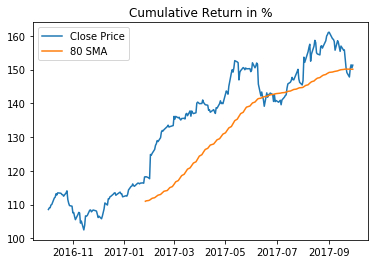

Recomendation:
The simple moving average startegy of window 80 yields a positive cumulative return. Hence, the strategy could be taken into consideration.


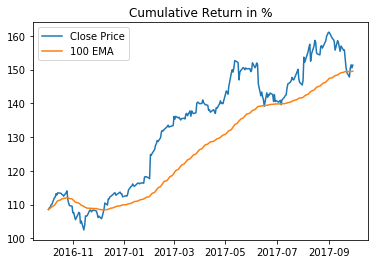

Recomendation:
The exponential moving average startegy of window 100 yields a positive cumulative return. Hence, the strategy could be taken into consideration.


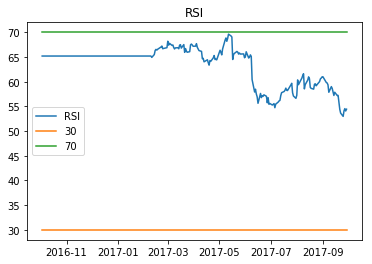

With given parameters input, we would recommend you Exponential Moving Average strategy in this stock because it yields max return of 0.1 on historical data.


In [47]:
output = get_strategy_recommendation(df)

In [48]:
output

,Cumulative Return
SMA,0.053273
EMA,0.100150
MR,0.055718
RSI,0.000000
